(493, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    493 non-null    object 
 1   state_code                      493 non-null    int64  
 2   state_name                      493 non-null    object 
 3   dist_code                       493 non-null    int64  
 4   population_total                493 non-null    int64  
 5   population_male                 493 non-null    int64  
 6   population_female               493 non-null    int64  
 7   0-6_population_total            493 non-null    int64  
 8   0-6_population_male             493 non-null    int64  
 9   0-6_population_female           493 non-null    int64  
 10  literates_total                 493 non-null    int64  
 11  literates_male                  493 non-null    int64  
 12  literates_female          

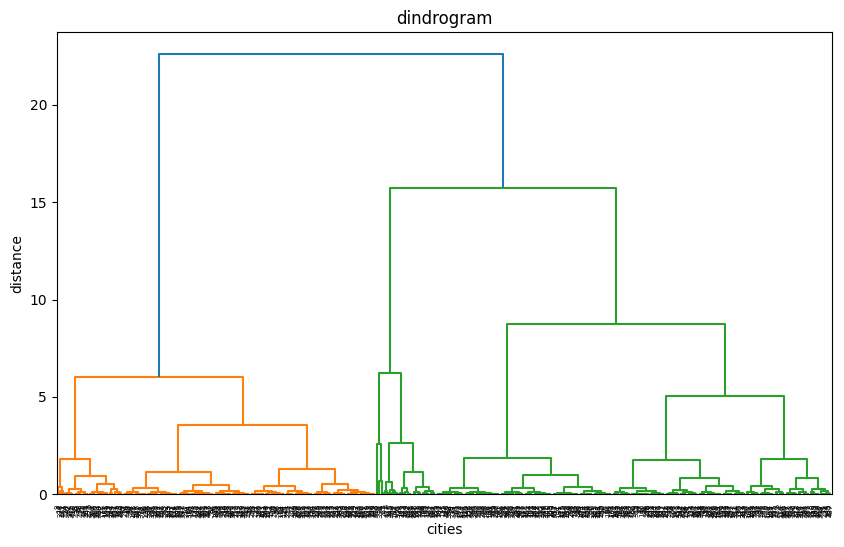

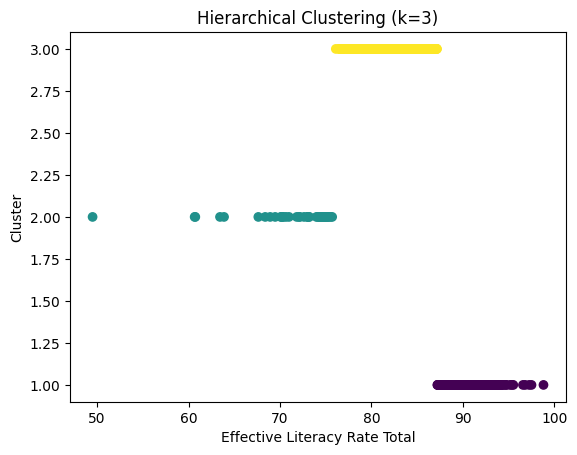

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# -----------------------------
# 1. Load dataset
# -----------------------------
df = pd.read_csv("cities_r2.csv")
print(df.shape)
print(df.info())
print(df.head())
# print(df.tail())

df.fillna(df.mode().loc[0], inplace=True)

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])
        
x = df[["effective_literacy_rate_total"]]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

linked = linkage(x_scaled,method="ward")

plt.figure(figsize=(10,6))
dendrogram(linked)
plt.title("dindrogram")
plt.xlabel("cities")
plt.ylabel("distance")
plt.show()

clusters = fcluster(linked,3,criterion="maxclust")
df["Cluster"] = clusters

plt.scatter(df['effective_literacy_rate_total'], df['Cluster'], c=df['Cluster'])
plt.title("Hierarchical Clustering (k=3)")
plt.xlabel("Effective Literacy Rate Total")
plt.ylabel("Cluster")
plt.show()